In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Wine 数据集
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"  
# 第一列为class，后十三个为特征
names = ['class', 'feature1','feature2','feature3','feature4','feature5','feature6',\
         'feature7','feature8','feature9','feature10','feature11','feature12','feature13',]  

data = pd.read_csv(url, names=names)
# data = pd.read_csv(url)
print(data)

     class  feature1  feature2  feature3  feature4  feature5  feature6  \
0        1     14.23      1.71      2.43      15.6       127      2.80   
1        1     13.20      1.78      2.14      11.2       100      2.65   
2        1     13.16      2.36      2.67      18.6       101      2.80   
3        1     14.37      1.95      2.50      16.8       113      3.85   
4        1     13.24      2.59      2.87      21.0       118      2.80   
..     ...       ...       ...       ...       ...       ...       ...   
173      3     13.71      5.65      2.45      20.5        95      1.68   
174      3     13.40      3.91      2.48      23.0       102      1.80   
175      3     13.27      4.28      2.26      20.0       120      1.59   
176      3     13.17      2.59      2.37      20.0       120      1.65   
177      3     14.13      4.10      2.74      24.5        96      2.05   

     feature7  feature8  feature9  feature10  feature11  feature12  feature13  
0        3.06      0.28      2.

In [2]:
class_set = set(data['class'].values)
print(class_set)

{1, 2, 3}


In [3]:
# # 创建一个映射字典将字符串标签映射为数字
# label_mapping = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}

# # 使用映射字典将字符串标签替换为数字
# data['class'] = data['class'].map(label_mapping)

# print(data)

In [4]:
# 将数据集转换为列表，以便打乱顺序
data_list = data.values.tolist()

# 打乱数据集的顺序
random.shuffle(data_list)

# 将打乱后的数据重新转换为DataFrame格式
shuffled_data = pd.DataFrame(data_list, columns=data.columns) 
    
data = shuffled_data

print(data)

     class  feature1  feature2  feature3  feature4  feature5  feature6  \
0      2.0     12.25      1.73      2.12      19.0      80.0      1.65   
1      1.0     14.39      1.87      2.45      14.6      96.0      2.50   
2      2.0     11.46      3.74      1.82      19.5     107.0      3.18   
3      2.0     12.43      1.53      2.29      21.5      86.0      2.74   
4      2.0     12.34      2.45      2.46      21.0      98.0      2.56   
..     ...       ...       ...       ...       ...       ...       ...   
173    3.0     13.88      5.04      2.23      20.0      80.0      0.98   
174    2.0     12.33      1.10      2.28      16.0     101.0      2.05   
175    3.0     12.87      4.61      2.48      21.5      86.0      1.70   
176    3.0     13.50      3.12      2.62      24.0     123.0      1.40   
177    1.0     13.05      1.73      2.04      12.4      92.0      2.72   

     feature7  feature8  feature9  feature10  feature11  feature12  feature13  
0        2.03      0.37      1.

In [5]:
# 定义函数计算欧氏距离
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# 定义KNN分类器
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # 计算测试点与所有训练点的距离
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # 获取最近的k个邻居的索引
        k_indices = np.argsort(distances)[:self.k]
        # 获取最近的k个邻居的标签
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # 返回出现频率最高的标签作为预测结果
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

In [6]:
iris_data = data.iloc[:, 1:].values
iris_target = data.iloc[:, 0].values

# 划分训练集和测试集
X_train, X_test, y_train, y_test = iris_data[:140], iris_data[140:], \
                                   iris_target[:140], iris_target[140:]

# 初始化KNN分类器，选择k值
knn = KNNClassifier(k=4)

# 训练模型
knn.fit(X_train, y_train)

# 预测测试集
y_pred = knn.predict(X_test)

In [7]:
# 计算分类准确性
accuracy = np.mean(y_pred == y_test)
print(f"分类准确性：{accuracy}")

分类准确性：0.7368421052631579


0
1
2


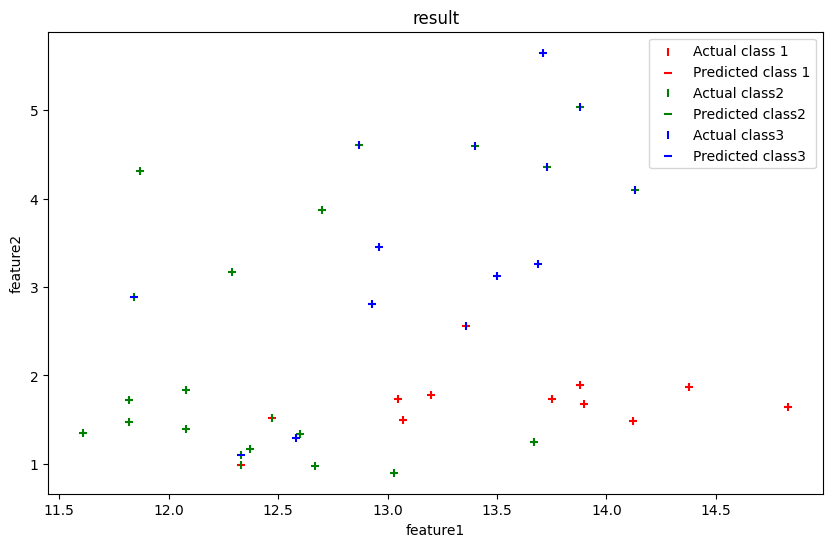

In [8]:
# 可视化分类结果
label_list = ['class 1', 'class2', 'class3']
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
target_names = np.unique(iris_target)
for i in range(len(target_names)):
    print(i)
    actual_class_points = X_test[y_test == target_names[i]]
    predicted_class_points = X_test[y_pred == target_names[i]]
    
    plt.scatter(actual_class_points[:, 0], actual_class_points[:, 1], c=colors[i], label=f'Actual {label_list[i]}', marker='|')
    plt.scatter(predicted_class_points[:, 0], predicted_class_points[:, 1], c=colors[i], label=f'Predicted {label_list[i]}', marker='_')

    
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.title('result')
plt.show()